#**Create a network**
(3 input units, 2 hidden layers of 4 units each and 2 output units)\
$h1 = sig(w1@x + b1)$ \
$h2 = sig(w2@h1 + b2)$ \
\$ out= w3@h2 + b3$ 


In [1]:
import numpy as np
np.random.seed(12345)

##**Weight initialization**

### initialize the w's with small random numbers: $W = 0.01 * np.random.rand(D, H)$
Works OK for small networks but it causes gradient vanishing deeper networks.

In [ ]:
def initialize(input_dim, hidden1_dim, hidden2_dim, output_dim, batch_size):
  W1 = np.random.randn(hidden1_dim, input_dim) * 0.01  # 根据给定维度生成[0,1）之间的数据
  b1 = np.zero((hidden1_dim,1))              # 返回来一个给定形状和类型的用0填充的数组
  W2 = np.random.randn(hidden2_dim, hidden1_dim) * 0.01
  b2 = np.zeros((hidden2_dim,1))
  W3 = np.random.randn(output_dim, hidden2_dim) * 0.01
  b3 = np.zeros((output_dim,1))

  parameters = [W1, b1, W2, b2, W3, b3]
  x = np.random.rand(input_dim, batch_size)
  y = np.random.randn(output_dim, batch_size)

  return parameters, x, y

### Xavier initialization: $W = np.random.rand(in, out) / np.sqrt(in)$
it works, but it has an issue, when we use RELU.

In [ ]:
def initialize(input_dim, hidden1_dim, hidden2_dim, output_dim, batch_size):
  W1 = np.random.randn(hidden1_dim, input_dim)/np.sqrt(hidden1_dim)  
  b1 = np.zero((hidden1_dim,1))              
  W2 = np.random.randn(hidden2_dim, hidden1_dim)/np.sqrt(hidden2_dim)
  b2 = np.zeros((hidden2_dim,1))
  W3 = np.random.randn(output_dim, hidden2_dim)/np.sqrt(output_dim)
  b3 = np.zeros((output_dim,1))

  parameters = [W1, b1, W2, b2, W3, b3]
  x = np.random.rand(input_dim, batch_size)
  y = np.random.randn(output_dim, batch_size)

  return parameters, x, y

### He initialization: $W = np.random.rand(in, out) / np.sqrt(in/2)$
Solves the issue with RELU

In [ ]:
def initialize(input_dim, hidden1_dim, hidden2_dim, output_dim, batch_size):
  W1 = np.random.randn(hidden1_dim, input_dim)/np.sqrt(hidden1_dim/2)  
  b1 = np.zero((hidden1_dim,1))              
  W2 = np.random.randn(hidden2_dim, hidden1_dim)/np.sqrt(hidden2_dim/2)
  b2 = np.zeros((hidden2_dim,1))
  W3 = np.random.randn(output_dim, hidden2_dim)/np.sqrt(output_dim/2)
  b3 = np.zeros((output_dim,1))

  parameters = [W1, b1, W2, b2, W3, b3]
  x = np.random.rand(input_dim, batch_size)
  y = np.random.randn(output_dim, batch_size)

  return parameters, x, y

## **Activation functions:**

### sigmiod: 
$ \sigma(x) = \frac{1}{1+e^{-x}} $ , $ \sigma'(x)=\sigma(x)(1-\sigma(x))$\
+good for binary function \
-gradient vanishing for x values away from zero \
-not good for image network(usually RELU) \
-non zero-centered

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def deriv_sigmoid(x):
    return x * (1-x)

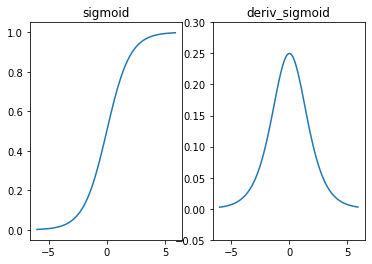

In [12]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("sigmoid")
x_ = np.arange(-6, 6, 0.1)
plt.ylim([-0.05, 1.05])
plt.plot(x_, sigmoid(x_))
plt.subplot(1,2,2)
plt.title("deriv_sigmoid")
plt.ylim([-0.05, 0.3])
plt.plot(x_, deriv_sigmoid(sigmoid(x_)))

### Tanh: $ tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} $ , $ tanh'(x)=1-tanh^2(x)$
-gradients vanishing for x values away from zero \
+zero-centered


In [13]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def deriv_tanh(x):
    return 1-np.sqrt(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


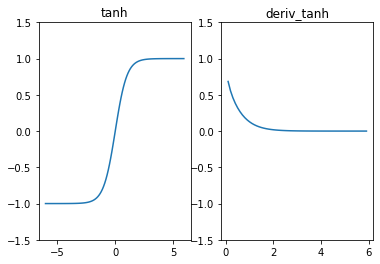

In [15]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("tanh")
x_ = np.arange(-6, 6, 0.1)
plt.ylim([-1.5, 1.5])
plt.plot(x_, tanh(x_))
plt.subplot(1,2,2)
plt.title("deriv_tanh")
plt.ylim([-1.5, 1.5])
plt.plot(x_, deriv_tanh(tanh(x_)))

### ReLU: 
$ReLU(x)=max(0,x)$, $f(z) = \left\{\begin{array}{rcl}} {z^2} & \mbox{for} & |z|<3 \\ {z} & \mbox{for} & |z|=3 \\ {z-1} & \mbox{for} & |z|>3 \end{array}\right$